What is RFM (recency, frequency, monetary) analysis?
RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. The system assigns each customer numerical scores based on these factors to provide an objective analysis. RFM analysis is based on the marketing adage that "80% of your business comes from 20% of your customers."

RFM analysis ranks each customer on the following factors:

- Recency. How recent was the customer's last purchase? Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again. Businesses often measure recency in days. But, depending on the product, they may measure it in years, weeks or even hours.

- Frequency. How often did this customer make a purchase in a given period? Customers who purchased once are often are more likely to purchase again. Additionally, first time customers may be good targets for follow-up advertising to convert them into more frequent customers.

- Monetary. How much money did the customer spend in a given period? Customers who spend a lot of money are more likely to spend money in the future and have a high value to a business.

* What is a good RFM score? The best RFM score is the one with the highest values for each variable. If a store uses a 1 to 4 scale for recency, frequency, and monetary, with 4 being the highest, then the perfect RFM score is 444.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from datetime import datetime , date
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('online.csv')
data.head(10)   

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom
5,125615,547051,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-03-20 12:06:00,0.42,12902,United Kingdom
6,483123,577493,20724,RED RETROSPOT CHARLOTTE BAG,10,2011-11-20 12:13:00,0.85,17323,United Kingdom
7,449888,575143,23343,JUMBO BAG VINTAGE CHRISTMAS,10,2011-11-08 15:37:00,2.08,13643,United Kingdom
8,127438,547223,22934,BAKING MOULD EASTER EGG WHITE CHOC,2,2011-03-21 15:10:00,2.95,12867,United Kingdom
9,189515,553156,21212,PACK OF 72 RETROSPOT CAKE CASES,2,2011-05-13 14:58:00,0.55,17841,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70864 non-null  int64  
 1   InvoiceNo    70864 non-null  int64  
 2   StockCode    70864 non-null  object 
 3   Description  70864 non-null  object 
 4   Quantity     70864 non-null  int64  
 5   InvoiceDate  70864 non-null  object 
 6   UnitPrice    70864 non-null  float64
 7   CustomerID   70864 non-null  int64  
 8   Country      70864 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 4.9+ MB


In [5]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [13]:
data['TotalSum']=data['Quantity']*data['UnitPrice']

In [14]:
data.isna().sum()

Unnamed: 0     0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSum       0
InvoiceDay     0
dtype: int64

In [15]:
max_trans_date = max(data['InvoiceDate']).date()
max_trans_date

datetime.date(2011, 12, 9)

In [9]:
# Define a function that will parse the date
def get_day(x): return datetime(x.year, x.month, x.day) 

# Create InvoiceDay column
data['InvoiceDay'] = data['InvoiceDate'].apply(get_day) 

In [18]:
rfm_table = data.groupby('CustomerID').agg({'InvoiceDay': lambda x:(datetime.strptime(str(max_trans_date),'%Y-%m-%d')-x.max()).days,
                                           'InvoiceNo':'count',
                                           'TotalSum':'sum'                                         
})
rfm_table.rename(columns={'InvoiceDay':'Recency','InvoiceNo':'Frequency','TotalSum':'Monetary'},inplace=True)

rfm_table.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12747,2,27,992.82
12748,0,967,7522.06
12749,3,37,813.45
12820,3,17,268.02
12822,70,9,146.15
12823,296,1,306.00
12824,59,6,106.38
12826,2,17,291.26
12827,32,2,44.55


In [19]:
r_labels=range(4,0,-1)
f_labels=range(1,5,1)
m_labels=range(1,5,1)

In [20]:
rfm_table['R']=pd.qcut(rfm_table['Recency'],q=4,labels=r_labels)
rfm_table['F']=pd.qcut(rfm_table['Frequency'],q=4,labels=f_labels)
rfm_table['M']=pd.qcut(rfm_table['Monetary'],q=4,labels=m_labels)

In [21]:
rfm_table

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12747,2,27,992.82,4,4,4
12748,0,967,7522.06,4,4,4
12749,3,37,813.45,4,4,4
12820,3,17,268.02,4,3,3
12822,70,9,146.15,2,2,3
...,...,...,...,...,...,...
18280,277,2,38.70,1,1,1
18281,180,2,31.80,1,1,1
18282,7,2,30.70,4,1,1


### Building RFM Scores and RFM Segments

In [22]:
def join_rfm(data):
    return str(data['R'])+str(data['F'])+str(data['M'])


In [25]:
rfm_table['RFM_Segment']=rfm_table.apply(join_rfm,axis=1)
rfm_table['RFM_Score']=rfm_table[['R','M','F']].sum(axis=1)

In [26]:
rfm_table.groupby('RFM_Segment').size().sort_values(ascending=False)[:10].to_frame().reset_index()

,RFM_Segment,0
0,444,379
1,111,345
2,344,165
3,211,165
4,233,131
5,222,130
6,311,128
7,333,124
8,122,116
9,433,114


In [27]:
def rfm_level(data):
    if data['RFM_Score']>=10:
        return 'Top'
    elif data['RFM_Score']>=6 and data['RFM_Score']<10:
        return 'Middle'
    else :
        return 'Low'        

In [28]:
rfm_table['Level']=rfm_table.apply(rfm_level,axis=1)

#### Bottom RFM Segments (111)

In [29]:
rfm_table[rfm_table['RFM_Segment']=='111'][:10]

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Level
CustomerID,,,,,,,,,
12837,173,2,10.55,1,1,1,111,3,Low
12852,294,2,32.55,1,1,1,111,3,Low
12902,264,4,42.03,1,1,1,111,3,Low
12922,161,4,57.24,1,1,1,111,3,Low
12929,311,3,42.90,1,1,1,111,3,Low
12956,306,2,7.90,1,1,1,111,3,Low
12974,197,2,47.50,1,1,1,111,3,Low
12977,156,1,0.65,1,1,1,111,3,Low
12999,205,2,21.90,1,1,1,111,3,Low


In [30]:
rfm_table.sort_values(by='RFM_Score',ascending=False)

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Level
CustomerID,,,,,,,,,
12747,2,27,992.82,4,4,4,444,12,Top
16839,8,50,2806.17,4,4,4,444,12,Top
15189,1,41,3379.11,4,4,4,444,12,Top
15187,1,26,1636.38,4,4,4,444,12,Top
16873,4,55,1323.21,4,4,4,444,12,Top
...,...,...,...,...,...,...,...,...,...
15280,172,4,23.32,1,1,1,111,3,Low
17194,360,4,51.92,1,1,1,111,3,Low
17187,226,2,31.60,1,1,1,111,3,Low


#### Analyzing Custom Segments

<AxesSubplot:title={'center':'Count of Each Segment'}, xlabel='Level', ylabel='count'>

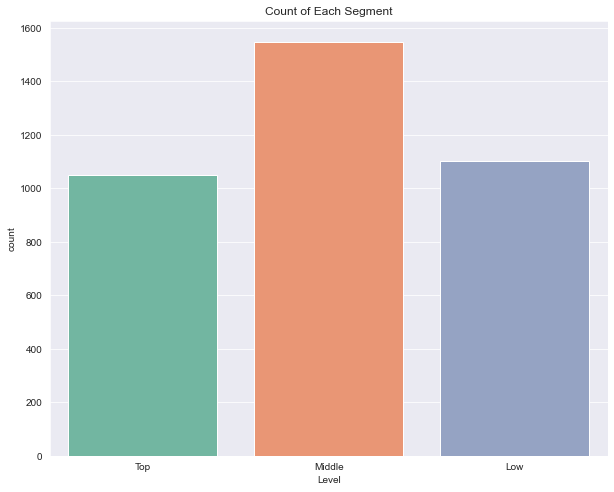

In [31]:
plt.figure(figsize=(10,8))
sns.set_palette('Set2')
sns.set_style('darkgrid')
plt.title('Count of Each Segment')
plt.xlabel('Segments')
plt.ylabel('Count')
sns.countplot(rfm_table['Level'])

In [ ]:
snake_date=rfm_table[['Recency','Frequency','Monetary','Level']]
x=snake_date[['Level']].reset_index()
x

,CustomerID,Level
0,12747,Top
1,12748,Top
2,12749,Top
3,12820,Top
4,12822,Middle
...,...,...
3696,18280,Low
3697,18281,Low
3698,18282,Middle
3699,18283,Top


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
snake_date_scaled=scaler.fit_transform(snake_date[['Recency','Frequency','Monetary']])


In [ ]:
snake_date_scaled=pd.DataFrame(snake_date_scaled,columns=scaler.get_feature_names_out())

In [ ]:
snake_date_scaled

,Recency,Frequency,Monetary
0,-0.918710,0.175184,0.415366
1,-0.938719,21.145364,4.844711
2,-0.908705,0.398272,0.293683
3,-0.908705,-0.047903,-0.076329
4,-0.238409,-0.226372,-0.159004
...,...,...,...
3696,1.832508,-0.382533,-0.231896
3697,0.862078,-0.382533,-0.236577
3698,-0.868688,-0.382533,-0.237323
3699,-0.908705,2.963772,0.035544


In [ ]:
snake_date_scaled=snake_date_scaled.join(x)

In [ ]:
# Melt the normalized dataset and reset the index
snake_date = pd.melt(
  					snake_date_scaled.reset_index(), 
                        
# Assign CustomerID and Cluster as ID variables                  
                    id_vars=['CustomerID', 'Level'],

# Assign RFM values as value variables
                    value_vars=['Recency', 'Frequency', 'Monetary'], 
                        
# Name the variable and value
                    var_name='Metric', value_name='Value'
					)


In [ ]:
snake_date

,CustomerID,Level,Metric,Value
0,12747,Top,Recency,-0.918710
1,12748,Top,Recency,-0.938719
2,12749,Top,Recency,-0.908705
3,12820,Top,Recency,-0.908705
4,12822,Middle,Recency,-0.238409
...,...,...,...,...
11098,18280,Low,Monetary,-0.231896
11099,18281,Low,Monetary,-0.236577
11100,18282,Middle,Monetary,-0.237323
11101,18283,Top,Monetary,0.035544


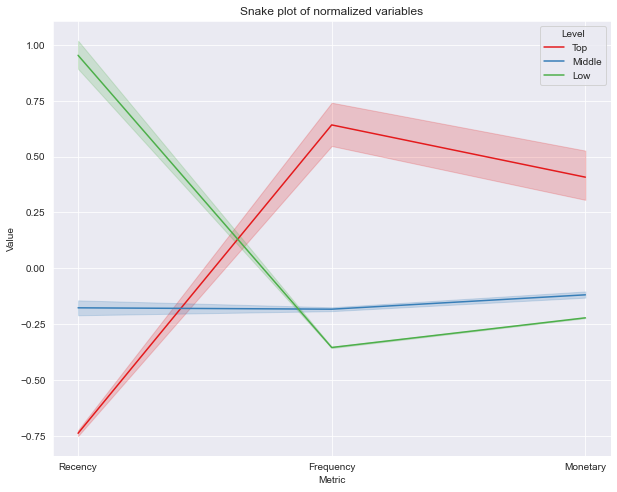

In [ ]:
plt.figure(figsize=(10,8))

plt.title('Snake plot of normalized variables')
plt.xlabel('Metric')
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=snake_date, x='Metric', y='Value', hue='Level',palette='Set1')
plt.show()

### Now lets remove Level Target and see if Kmeans clustering will give us same results 

In [32]:
rfm_table=rfm_table.drop(columns=('Level'))

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

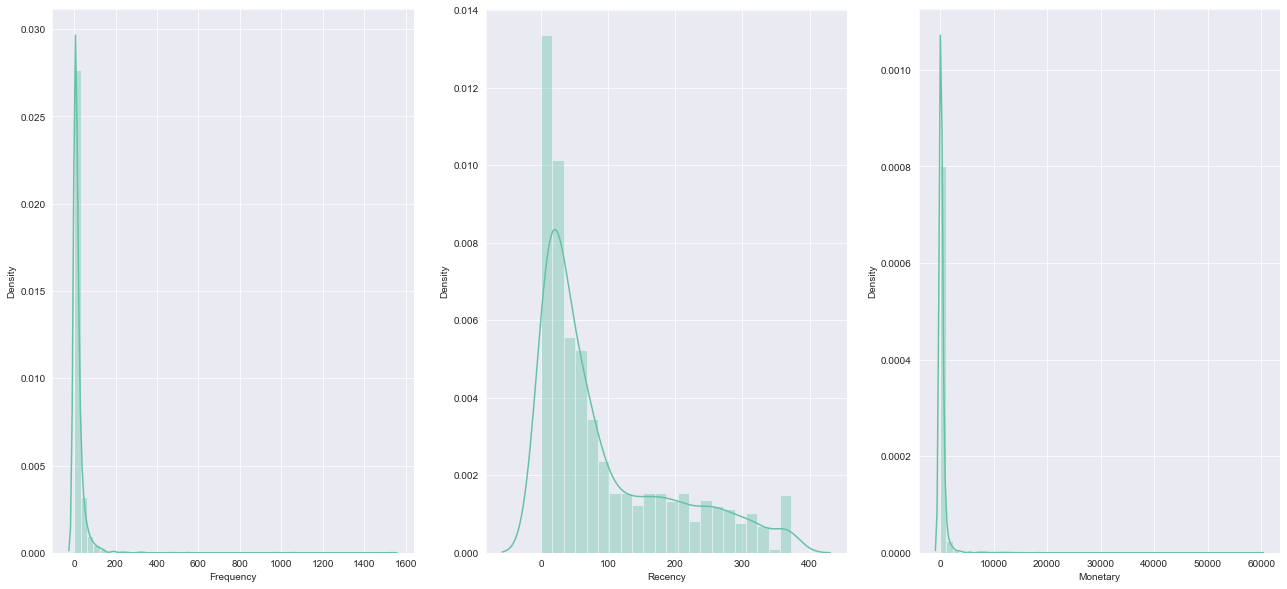

In [33]:
fig,axes=plt.subplots(1,3,figsize=(22,10))
sns.distplot(rfm_table['Frequency'],ax=axes[0])
sns.distplot(rfm_table['Recency'],ax=axes[1])
sns.distplot(rfm_table['Monetary'],ax=axes[2])
# Variables are Skewed 

In [34]:
rfm_table.describe()

,Recency,Frequency,Monetary,RFM_Score
count,3701.000000,3701.000000,3701.000000,3701.000000
mean,93.830316,19.147257,380.535069,7.439341
std,99.969238,44.831615,1474.285937,2.820851
min,0.000000,1.000000,0.650000,3.000000
25%,18.000000,4.000000,59.400000,5.000000
50%,52.000000,9.000000,140.300000,7.000000
75%,151.000000,21.000000,337.800000,10.000000
max,373.000000,1532.000000,59596.070000,12.000000


In [36]:
# Apply log transformation to Variables to Frequency
rfm_table['Frequency_log'] = np.log(rfm_table['Frequency'])

# Apply log transformation to Recency
rfm_table['Recency_log'] = np.log(rfm_table['Recency'])

# Apply log transformation to Monetary
rfm_table['Monetary_log'] = np.log(rfm_table['Monetary'])

In [37]:
inf=rfm_table[rfm_table['Recency_log']==float('-inf')]
rfm_table.drop(inf.index,inplace=True)

#### Lets see now Variables Distribution

<AxesSubplot:xlabel='Monetary_log', ylabel='Density'>

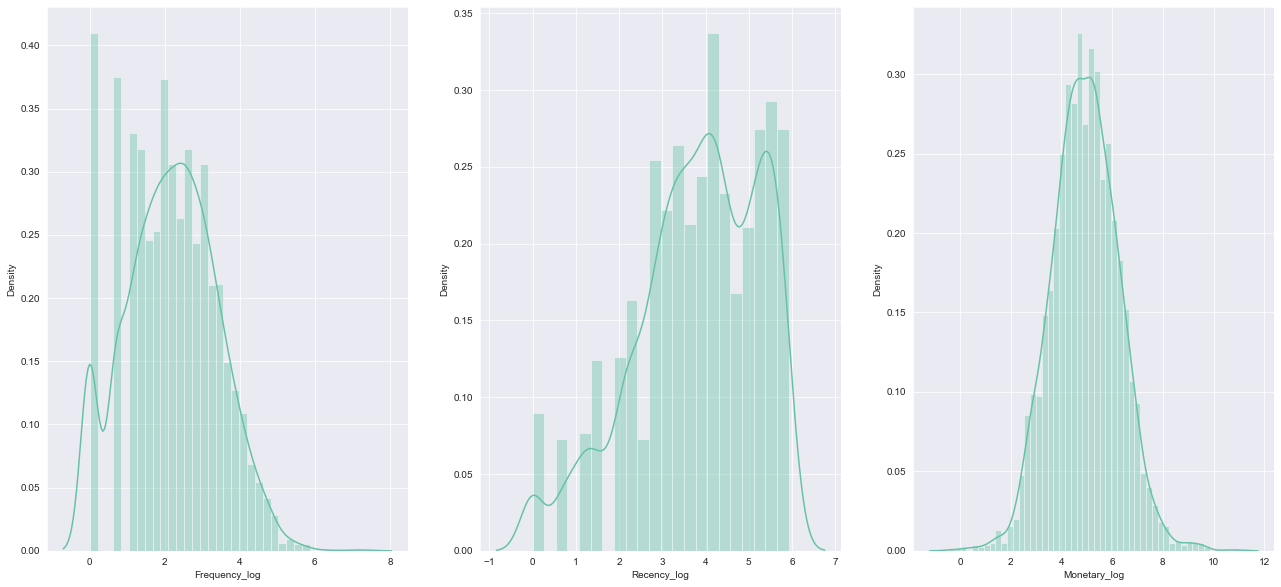

In [38]:
fig,axes=plt.subplots(1,3,figsize=(22,10))
sns.distplot(rfm_table['Frequency_log'],ax=axes[0])
sns.distplot(rfm_table['Recency_log'],ax=axes[1])
sns.distplot(rfm_table['Monetary_log'],ax=axes[2])

### Centering and Scaling with StandardScaler()


In [39]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(rfm_table)

In [42]:
data_scaled=pd.DataFrame(data_scaled,columns=scaler.get_feature_names_out())
data_scaled=data_scaled[['Frequency_log','Recency_log','Monetary_log']]

In [80]:
data_scaled

,Frequency_log,Recency_log,Monetary_log
0,0.922156,-2.164067,1.501224
1,1.181913,-1.881496,1.348766
2,0.540763,-1.881496,0.499333
3,0.016445,0.313675,0.035354
4,-1.794978,1.318519,0.600727
...,...,...,...
3675,-1.223537,1.272285,-0.981309
3676,-1.223537,0.971876,-1.131555
3677,-1.223537,-1.291010,-1.158489
3678,2.346779,-1.881496,0.866210


In [51]:
wcss=[]
scores=[]
for i in range(2,15):
    kmeans=KMeans(n_clusters=i)
    y_kmeans=kmeans.fit_predict(data_scaled)
    wcss.append(kmeans.inertia_)
    scores.append(silhouette_score(data_scaled,y_kmeans))

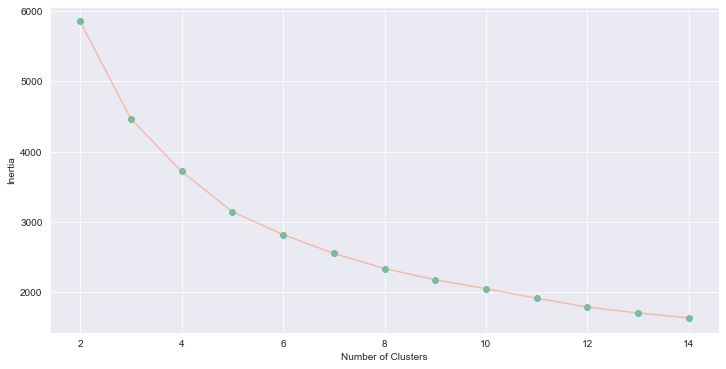

In [114]:
plt.figure(1 , figsize = (12,6))
plt.plot(np.arange(2,15) , wcss , 'o')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.plot(np.arange(2, 15) , wcss, alpha = 0.5)
plt.show()

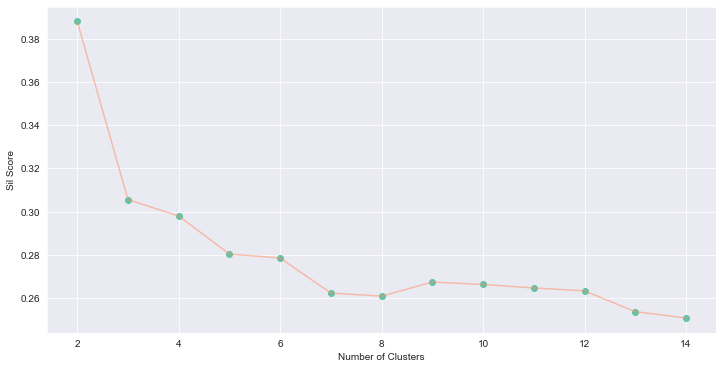

In [116]:
plt.figure(1 , figsize = (12,6))
plt.plot(np.arange(2,15) , scores , 'o')
plt.xlabel('Number of Clusters') , plt.ylabel('Sil Score')
plt.plot(np.arange(2, 15) , scores, alpha = 0.5)
plt.show()

In [88]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data_scaled)

In [89]:
kmeans.cluster_centers_

array([[-0.69237174,  0.56103963, -0.64270967],
       [ 0.80817478, -0.65487664,  0.75020646]])

In [131]:
final_data_k2=rfm_table[['Recency','Frequency','Monetary']].reset_index()
final_data_k2['Level']=pd.DataFrame(y_kmeans)
final_data_k2.drop(columns='index',inplace=True)
final_data_k2

,Recency,Frequency,Monetary,Level
0,2,27,992.82,1
1,3,37,813.45,1
2,3,17,268.02,1
3,70,9,146.15,0
4,296,1,306.00,0
...,...,...,...,...
3675,277,2,38.70,0
3676,180,2,31.80,0
3677,7,2,30.70,0
3678,3,152,432.93,1


### Let's Check each Level and See its Information

In [132]:
final_data_k2.groupby('Level').describe().T

Level                      0             1
Recency   count  1985.000000   1695.000000
          mean    145.747103     34.193510
          std     106.354780     41.886100
          min       1.000000      1.000000
          25%      53.000000      8.000000
          50%     121.000000     21.000000
          75%     234.000000     43.000000
          max     373.000000    372.000000
Frequency count  1985.000000   1695.000000
          mean      5.166751     34.410619
          std       4.084898     56.968954
          min       1.000000      1.000000
          25%       2.000000     14.000000
          50%       4.000000     22.000000
          75%       7.000000     38.000000
          max      33.000000   1532.000000
Monetary  count  1985.000000   1695.000000
          mean     90.222156    698.466803
          std     109.771929   2095.835503
          min       0.650000     30.560000
          25%      33.150000    197.800000
          50%      65.150000    344.520000
          75%     112.540000    641.760000
          max    3096.000000  59596.070000

### We need to try 3 Clusters and see its Statistical Info too

In [133]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans_k3=kmeans.fit_predict(data_scaled)

In [135]:
final_data_k3=rfm_table[['Recency','Frequency','Monetary']].reset_index()
final_data_k3['Level']=pd.DataFrame(y_kmeans_k3)
final_data_k3.drop(columns='index',inplace=True)

In [138]:
final_data_k3.groupby('Level').describe().T.round(2)

Level                  0         1         2
Recency   count  1904.00   1149.00    627.00
          mean    146.31     55.24      8.34
          std     107.21     53.97      7.86
          min       1.00      2.00      1.00
          25%      52.00     22.00      3.00
          50%     122.50     37.00      5.00
          75%     236.00     67.00     11.00
          max     373.00    372.00     44.00
Frequency count  1904.00   1149.00    627.00
          mean      4.83     20.48     57.17
          std       3.65     13.21     87.47
          min       1.00      1.00      1.00
          25%       2.00     12.00     22.00
          50%       4.00     17.00     39.00
          75%       7.00     25.00     67.50
          max      24.00    118.00   1532.00
Monetary  count  1904.00   1149.00    627.00
          mean     85.06    354.54   1265.83
          std     107.50    532.09   3295.38
          min       0.65     30.56     36.68
          25%      32.40    167.73    344.76
          50%      62.37    252.80    636.66
          75%     106.12    406.80   1096.72
          max    3096.00  13698.50  59596.07